In [14]:
#Implementation of S-DES

P10 = (3, 5, 2, 7, 4, 10, 1, 9, 8, 6)
P8 = (6, 3, 7, 4, 8, 5, 10, 9)
P4 = (2, 4, 3, 1)

IP = (2, 6, 3, 1, 4, 8, 5, 7)
IPi = (4, 1, 3, 5, 7, 2, 8, 6)

E = (4, 1, 2, 3, 2, 3, 4, 1)

S0 = [
        [1, 0, 3, 2],
        [3, 2, 1, 0],
        [0, 2, 1, 3],
        [3, 1, 3, 2]
     ]

S1 = [
        [0, 1, 2, 3],
        [2, 0, 1, 3],
        [3, 0, 1, 0],
        [2, 1, 0, 3]
     ]

def permutation(pattern, key):
    permuted = ""
    for i in pattern:
        permuted += key[i-1]
    return permuted

def generateKey(left, right, leftShift):
    newLeft = left[leftShift:] + left[:leftShift]
    newRight = right[leftShift:] + right[:leftShift]
    key = permutation(P8,newLeft + newRight)
    return key

def transform(right, key):
    extended=permutation(E, right)
    xor_cipher=bin(int(extended,2)^int(key,2))[2:].zfill(8)
    xor_left=xor_cipher[:4]
    xor_right=xor_cipher[4:]
    new_left=str(Sbox(xor_left, S0))
    new_right=str(Sbox(xor_right, S1))
    return permutation(P4, new_left+new_right)
    
def Sbox(data,box):
    row=int(data[0]+data[3], 2)
    col=int(data[1]+data[2], 2)
    return bin(box[row][col])[2:].zfill(2)

def encrypt(left, right, key):
    cipher=int(left,2)^int(transform(right, key),2)
    return right, bin(cipher)[2:].zfill(4)

def decrypt(left, right, key):
    plaintext = int(left,2) ^ int(transform(right, key),2)
    return right, bin(plaintext)[2:].zfill(4)

key = "1010101010"
# input("Enter a 10-bit key: ")
plain_text = "10101010"
# input("Enter a 8-bit plain text: ")

key10 = permutation(P10, key)
left = key10[:5]
right = key10[5:]

k1 = generateKey(left, right, 1)
k2 = generateKey(left, right, 3)
print("Key1: ", k1)
print("Key2: ", k2)
print("Plain Text", plain_text)

initial_permutation = permutation(IP, plain_text)
left = initial_permutation[:len(initial_permutation)//2]
right = initial_permutation[len(initial_permutation)//2:]
left, right = encrypt(left, right, k1) 
left, right = encrypt(left, right, k2)
cipherText = permutation(IPi, right + left)
print("Cipher Text:", cipherText)

initial_permutation = permutation(IP, cipherText)
left = initial_permutation[:len(initial_permutation)//2]
right = initial_permutation[len(initial_permutation)//2:]
left, right = decrypt(left, right, k2) 
left, right = decrypt(left, right, k1)
originalText = permutation(IPi, right + left)
print("Original Text:", originalText)

Key1:  11100100
Key2:  01010011
Plain Text 10101010
Cipher Text: 01101011
Original Text: 10101010


In [15]:
#Implementation of Diffie-Hellman key exchange

p = 23
q = 17

#Secret numbers
a = 4
b = 3

R = pow(q,a,p)
S = pow(q,b,p)

#Secret keys
Kr = pow(S,a,p)
Ks = pow(R,b,p)

if Kr==Ks:
    key = Kr
    print("Shared Key: ", key)

Shared Key:  6


In [16]:
#Implementation of RSA

from random import randint

def gcd(a, b):
    if b==0:
        return a 
    return gcd(b,a%b)

def encrypt(message, key):
    e = key[0]
    n = key[1]
    cipher = [pow(ord(char),e,n) for char in message]
    return cipher

def decrypt(cipher, key):
    d = key[0]
    n = key[1]
    message = [chr(pow(c,d,n)) for c in cipher]
    return "".join(message)

p = 17
q = 23
n = p*q
phi = (p-1)*(q-1)
e = randint(1, phi)
_gcd = gcd(e, phi)
while _gcd!=1:
    e = randint(1, phi)
    _gcd = gcd(e, phi)
for i in range(100):
    if (phi * i + 1)%e==0:
        d = (phi*i+1)/e
        break
public = (e,n)
private = (int(d),n)
print("Public Key: ", public)
print("Private Key: ", private)

message = "Hello"
print("Initial message: ", message)
cipher = encrypt(message, public)
print("Cipher Text: ", ''.join(map(lambda x: str(x), cipher)))
decrypted_message = decrypt(cipher, private)
print("Decrypted message: ", decrypted_message)

Public Key:  (263, 391)
Private Key:  (87, 391)
Initial message:  Hello
Cipher Text:  3532718282155
Decrypted message:  Hello


In [17]:
#Implementation of ECC algorithm

import math
from random import randint

def point(a,b):
    if (4*(a**3) + 27*(b**2))==0:
        print("Use different a and b") #Has singular points
        return
    x = 1
    while True:
        rhs = (x**3) + a*x + b
        y = int(math.sqrt(rhs))
        lhs = y**2
        if lhs==rhs:
            return [x,y]
        else:
            x+=1

a = 3
b = 4
G = point(a,b)
print("Generator Point", G)

#priv_a = 13
#pub_a = [priv_a * G[0], priv_a * G[1]]
#print("Public Key of A: ", pub_a)

priv_b = 15
pub_b = [priv_b * G[0], priv_b * G[1]]
print("Public Key of B: ", pub_b)

message = "10001010"
x = randint(0,10)
c1 = x * (G[0] + G[1])
c2 = int(message) + x * (pub_b[0] + pub_b[1])
cipher = [c1, c2]
print("Cipher Text: ", cipher)

r = priv_b * c1
decrypted_message = c2 - r
print("Decrypted Message: ", decrypted_message)

Generator Point [5, 12]
Public Key of B:  [75, 180]
Cipher Text:  [17, 10001265]
Decrypted Message:  10001010


<h3>ML</h3>

y= x* 4.58789860997547 + 12.584627964022893


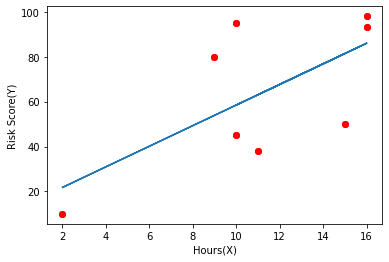

In [18]:
# Assignment on Linear Regression: 
# The following table shows the results of a recently conducted study on the correlation of the number of hours spent driving with the risk of developing acute backache. Find the equation of the best fit line for this data,

# Number of hours spent driving (x)	Risk score on a scale 0-100 (y)
# 10	95
# 9	    80
# 2	    10
# 15	50
# 10	45
# 16	98
# 11	38
# 16	93

import numpy as np
import matplotlib.pyplot as plt

x = np.array([10,9,2,15,10,16,11,16])
y=np.array([95,80,10,50,45,98,38,93])

plt.scatter(x, y,color='red')
plt.xlabel('Hours(X)')
plt.ylabel('Risk Score(Y)')

x_mean = sum(x)/len(x)
y_mean = sum(y)/len(y)

numerator = 0
denominator = 0
for i in range(len(x)):
    numerator+=(x[i]-x_mean)*(y[i]-y_mean)
    denominator+=((x[i]-x_mean)**2)
b1 = numerator/denominator
b0 = y_mean - b1*x_mean

print("y= x*",b1,"+",b0)

predict=[]
for i in range(len(x)):
    y_pred = b0 + b1 * x[i]
    predict.append(y_pred)

plt.scatter(x, y,color='red')
plt.xlabel('Hours(X)')
plt.ylabel('Risk Score(Y)')
plt.plot(x,predict)

Gini(Dataset) :  0.4591836734693877
Gini( 21-35 ):  0.0
Gini( <21 ):  0.48
Gini( >35 ):  0.48
Information gain(age) :  0.11632653061224485
Gini( high ):  0.5
Gini( low ):  0.375
Gini( medium ):  0.4444444444444444
Information gain(income) :  0.018707482993197244
Gini( female ):  0.24489795918367352
Gini( male ):  0.48979591836734704
Information gain(gender) :  0.09183673469387743
Gini( married ):  0.48979591836734704
Gini( single ):  0.40816326530612246
Information gain(marital_status) :  0.010204081632652962
0.11632653061224485
[['<21' 'high' 'male' 'single']
 ['<21' 'high' 'male' 'married']
 ['21-35' 'high' 'male' 'single']
 ['>35' 'medium' 'male' 'single']
 ['>35' 'low' 'female' 'single']
 ['>35' 'low' 'female' 'married']
 ['21-35' 'low' 'female' 'married']
 ['<21' 'medium' 'male' 'single']
 ['<21' 'low' 'female' 'married']
 ['>35' 'medium' 'female' 'single']
 ['<21' 'medium' 'female' 'married']
 ['21-35' 'medium' 'male' 'married']
 ['21-35' 'high' 'female' 'single']
 ['>35' 'medium

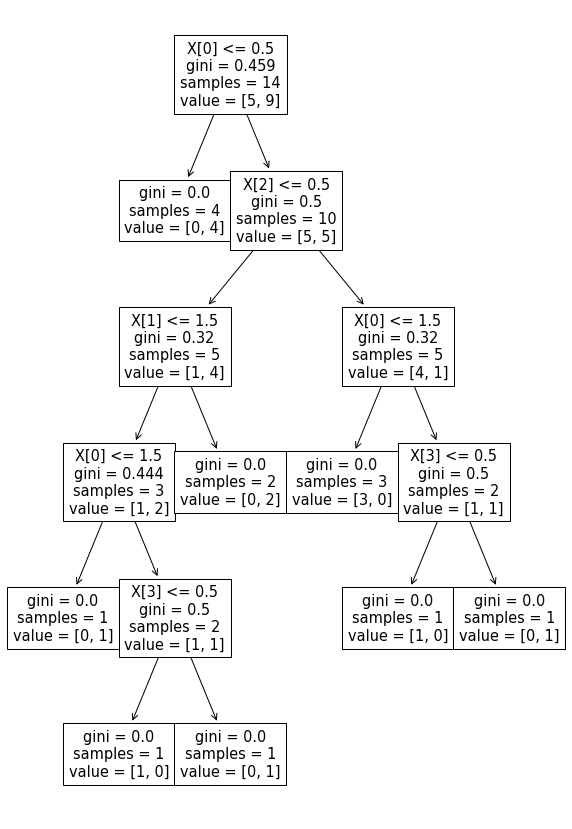

In [19]:
# Assignment on Decision Tree Classifier: 
# A dataset collected in a cosmetics shop showing details of customers and whether they responded to a special offer to buy a new lipstick is shown in table below. Use this dataset to build a decision tree, with Buys as the target variable, to help in buying lipsticks in the future. Find the root node of decision tree. According to the decision tree you have made from previous training data set, what is the decision for the test data: [Age < 21, Income = Low, Gender = Female, Marital Status = Married]?

import numpy as np
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as mp
from sklearn.tree import DecisionTreeClassifier

data = {
    'age': ['<21', '<21', '21-35', '>35', '>35', '>35', '21-35', '<21', '<21', '>35', '<21', '21-35', '21-35', '>35'], 
    'income':['high','high','high','medium','low','low','low','medium','low','medium','medium','medium','high','medium'],
    'gender':['male','male','male','male','female','female','female','male','female','female','female','male','female','male'],
    'marital_status':['single', 'married', 'single', 'single', 'single', 'married', 'married', 'single', 'married','single','married','married','single','married'],
    'buys':['no','no','yes','yes','yes','no','yes','no','yes','yes','yes','yes','yes','no']
} 
df = pd.DataFrame.from_dict(data) 

rows = df.shape[0]
labels = df.buys.unique()
values= df.buys.value_counts()
target_gini =0

for i in range(0,len(values)):
    probability = values[labels[i]]/rows
    target_gini = target_gini + (probability**2)

target_gini = 1 - target_gini

print("Gini(Dataset) : ",target_gini)

def gini(feature,target,count):
    gini= 0
    gini_values=list()
    
    yes_probability = 0
    no_probability = 0
    labels=np.unique(feature) 
    
    for i in range(0,len(labels)):
        yes_probability = 0
        gini = 0
        no_probability = 0
        for j in range(0,len(values)):
            if feature[j]==labels[i] and target[j]=='yes':
                yes_probability = yes_probability+1
            if feature[j]==labels[i] and target[j]=='no':
                no_probability = no_probability+1
        gini = ((yes_probability/count[labels[i]])**2) + ((no_probability/count[labels[i]])**2)
        gini = 1 - gini
        gini_values.append(gini)
        print("Gini(",labels[i],"): ",gini)
    return gini_values
    
#Calculating Information Gain
def info_gain(feature,gini_values,target_gini,count):
    gain = 0
    labels=np.unique(feature)
    for i in range(0,len(labels)):
        gain = gain+count[labels[i]]/rows * gini_values[i]
    return target_gini - gain

values = df['age'].values
target = df['buys'].values
count = df['age'].value_counts()
gini_age = gini(values,target,count)
gain_age = info_gain(values,gini_age,target_gini,count)
print("Information gain(age) : ",gain_age)

values = df['income'].values
count = df['income'].value_counts()
gini_income = gini(values,target,count)
gain_income = info_gain(values,gini_income,target_gini,count)
print("Information gain(income) : ",gain_income)

values = df['gender'].values
count = df['gender'].value_counts()
gini_gender = gini(values,target,count)
gain_gender = info_gain(values,gini_gender,target_gini,count)
print("Information gain(gender) : ",gain_gender)

values = df['marital_status'].values
count = df['marital_status'].value_counts()
gini_marital_status = gini(values,target,count)
gain_marital_status = info_gain(values,gini_marital_status,target_gini,count)
print("Information gain(marital_status) : ",gain_marital_status)

root = max(gain_age,gain_income,gain_gender,gain_marital_status)
print(root)

X = df.iloc[:,[0,1,2,3]].values
Y = df.iloc[:,-1].values

print(X)
print(Y)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
length = X.shape[1]
i = 0
while i < length:
    X[:,i] = le.fit_transform(X[:,i])
    i = i+1

    #Using sklearn Decision Tree model with GINI INDEX 
dc = DecisionTreeClassifier(criterion='gini')
dc = dc.fit(X,Y)

from sklearn import tree
fig = mp.figure(figsize=(10,15))
image = tree.plot_tree(dc)

predicted_set = dc.predict(X)
# Predicting
print("Age < 21 (1), Income = Low (1), Gender = Female (0), Marital Status = Married (0)")
print("Prediction: " , dc.predict([[1, 1, 0, 0]]))

from sklearn.metrics import confusion_matrix,accuracy_score, f1_score

cm = confusion_matrix(Y, predicted_set)
ascore = accuracy_score(Y, predicted_set)
fscore = f1_score(Y, predicted_set, pos_label="no")

print("Confusion Matrix: \n", cm)
print("Accuracy Score: ", ascore)
print("F1-Score: ", fscore)

In [1]:
import pandas as pd
import numpy as np

#create class Node with name --> signifies the category(Age,Income etc)
#                       condition --> signifies the condition(>21,21-35 etc)
#                       children --> empty list will be appended further
class Node:
    def __init__(self,name,condition):
        self.name=name
        self.condition=condition
        self.children=[]

    #Helper function to print node with details
    def getDetails(self):
        return self.name+" --> "+self.condition

#create DecisionTree class with dataset--> signifies whole dataset
#                             target_class--> "Buys"
#                           root--> root is initilized as Node   
#                           max_gain_classes --> for storing all levels of tree & order of selection
#                                           of the categories             
class DecisionTree:
    def __init__(self,dataset,target_class):
        self.dataset=dataset
        self.target_class=target_class
        self.root=Node("Dummy Root","No condition")
        self.max_gain_classes=[]

    def get_info_gain(self,datacolumn):
        #Get count of p and n
        p=0
        n=0

        for data in datacolumn:
            if data=='Y':
                p+=1
            else:
                n+=1

        #calc information gain value
        p_ratio=p/(n+p)
        n_ratio=n/(n+p)

        inf_gain=0

        #inf_gain=-(n/n+p*log2*(n/n+p)+p/p+n*log2(p/p+n))
        if(p_ratio==0):
            inf_gain=-(n_ratio*np.log2(n_ratio))
        elif(n_ratio==0):
            inf_gain=-(p_ratio*np.log2(p_ratio))
        else:
            inf_gain=-(p_ratio*np.log2(p_ratio) +n_ratio*np.log2(n_ratio))

        return p,n,inf_gain        

    def get_entropy(self,dataset,column_name,p,n):
        #get datacolumn
        datacolumn=dataset[column_name]

        #first get the number of categories
        unique_categories=datacolumn.unique()

        #Now, go thru each catgegory
        entropy=0
        for category in unique_categories:  
            #firstly, create a sub dataset containing only that category from dataset
            df_category=dataset[dataset[column_name]==category]

            #now call information gain function to get p_df,n_df and IG_i
            p_i,n_i,IG_i=self.get_info_gain(df_category[self.target_class])

            entropy+=(p_i*n_i)/(p*n)*(IG_i)

        return entropy

    #Call build with original dataset and Dummy root node
    def build_tree(self):
        self.build(self.dataset,self.root)
    
    def build(self,dataset,root):

        #Get information gain of target
        p,n,inf_gain=self.get_info_gain(dataset[self.target_class])

        #if the inf_gain value is zero, we have reached a leaf node
        # So, check if it is a "Y" or "N"
        # Append it to the current root's children 
        # and return it
        if(inf_gain==0):
            root.children.append(Node(self.target_class,"Y" if n==0 else "N"))
            return root
        
        #Calculate entropy

        #get columns    
        columns=dataset.columns

        #init max_gain,max_gain_index & max_gain_column
        max_gain=0
        max_gain_index=-1
        max_gain_column=None

        #go thru all columns
        for index in range(len(columns)):
            column_name=columns[index]

            #if target class is reached, skip it
            if column_name==self.target_class:
                continue

            #get entropy        
            entropy=self.get_entropy(dataset,column_name,p,n)

            #calc gain=inf_gain-entropy
            gain=inf_gain-entropy

            #find highest gain,so keep updating
            if gain>max_gain:
                max_gain=gain
                max_gain_index=index
                max_gain_column=column_name

        print("Max Gain:",max_gain,"Category next selected:",columns[max_gain_index])

        self.max_gain_classes.append(columns[max_gain_index])

        #now, decompose into datasets based on categories
        datacolumn=dataset[max_gain_column]

        unique_categories=datacolumn.unique()

        #now for every unique_category, create a new df and play
        for category in unique_categories:

            #create a new dataframe with dataset[max_gain_column]==category
            df=pd.DataFrame(dataset[dataset[max_gain_column]==category],columns=columns)

            #drop the max_gain_column from all rows(axis=1)
            df=df.drop(max_gain_column,axis=1)

            #reset_index with dropping index column
            df=df.reset_index(drop=True)

            print("Category:",category)    
            print(df)
            
            #now, call build again to get the children, 
            # with current category & max_gain_col as Node parent
            child=self.build(df,Node(max_gain_column,category))

            #once you get the child append it to root
            root.children.append(child)

        return root

    #Function to print tree
    def print_tree(self,root):
        #First print the node

        #if then condition
        if root.name==self.target_class:
            print("THEN Node:",root.getDetails())
        else: 
            print("IF Node:",root.getDetails())

        #If we reached the leaf ie root.name is target_class, return
        if root.name==self.target_class:
            return

        #get all children & travel thru the list and call print tree
        for child in root.children:
            self.print_tree(child)

        return

    #Function for prediction
    def predict(self,test_query,test_columns):

        #remove unneccessary columns and create new_test_columns, new_test_query
        # by matching with max_gain_classes
        new_test_columns=[]
        new_test_query=[]

        for index in range(len(test_columns)):
            if test_columns[index] in self.max_gain_classes:
                new_test_columns.append(test_columns[index])
                new_test_query.append(test_query[index])

        print("New test cols:",new_test_columns)    
        print("New test query:",new_test_query)

        #Go for BFS to get the leaf node answer
        node=self.root

        index=0
        bfs_q=[node]

        while len(bfs_q)>0:

            node=bfs_q[0]

            print("Node:",node.getDetails())

            bfs_q.remove(node)

            for child in node.children:
                print("Child details:",child.getDetails())

                #if we reached leaf node ie name is target_class, return Y or N ie condition
                if child.name == self.target_class:
                    return child.condition

                #Now go to index with the current child name
                while new_test_columns[index]!=child.name:
                    index+=1

                #now index has matched, just append to bfs_q
                if child.condition == new_test_query[index]:
                    bfs_q.append(child)

        return None

data = [
  ['<21', 'High', 'M', 'Single', 'N'],
  ['<21', 'High', 'M', 'Married', 'N'],
  ['21-35', 'High', 'M', 'Single', 'Y'],
  ['>35', 'Medium', 'M', 'Single', 'Y'],
  ['>35', 'Low', 'F', 'Single', 'Y'],
  ['>35', 'Low', 'F', 'Married', 'N'],
  ['21-35', 'Low', 'F', 'Married', 'Y'],
  ['<21', 'Medium', 'M', 'Single', 'N'],
  ['<21', 'Low', 'F', 'Married', 'Y'],
  ['>35', 'Medium', 'F', 'Single', 'Y'],
  ['<21', 'Medium', 'F', 'Married', 'Y'],
  ['21-35', 'Medium', 'M', 'Married', 'Y'],
  ['21-35', 'High', 'F', 'Single', 'Y'],
  ['>35', 'Medium', 'M', 'Married', 'N']
]

columns = ["Age", "Income","Gender","Marital Status","Buys"]

dataset=pd.DataFrame(data=data,columns=columns)

dt=DecisionTree(dataset,"Buys")

dt.build_tree()

#Print the order of categories being selected
print(dt.max_gain_classes)

#Print tree
print("Printing tree")
dt.print_tree(dt.root)

test_columns=['Age','Income','Gender','Marital Status']

#Making predictions
print(dt.predict(['<21','Low','F','Married'],test_columns))
print(dt.predict(['21-35','Low','F','Married'],test_columns))
print(dt.predict(['>35','Low','F','Single'],test_columns))

#Output
# Max Gain: 0.6813658001493862 Category next selected: Age
# Category: <21
#    Income Gender Marital Status Buys
# 0    High      M         Single    N
# 1    High      M        Married    N
# 2  Medium      M         Single    N
# 3     Low      F        Married    Y
# 4  Medium      F        Married    Y
# Max Gain: 0.9709505944546686 Category next selected: Gender
# Category: M
#    Income Marital Status Buys
# 0    High         Single    N
# 1    High        Married    N
# 2  Medium         Single    N
# Category: F
#    Income Marital Status Buys       
# 0     Low        Married    Y       
# 1  Medium        Married    Y       
# Category: 21-35
#    Income Gender Marital Status Buys
# 0    High      M         Single    Y
# 1     Low      F        Married    Y
# 2  Medium      M        Married    Y
# 3    High      F         Single    Y
# Category: >35
#    Income Gender Marital Status Buys
# 0  Medium      M         Single    Y
# 1     Low      F         Single    Y
# 2     Low      F        Married    N
# 3  Medium      F         Single    Y
# 4  Medium      M        Married    N
# Max Gain: 0.9709505944546686 Category next selected: Marital Status
# Category: Single
#    Income Gender Buys
# 0  Medium      M    Y
# 1     Low      F    Y
# 2  Medium      F    Y
# Category: Married
#    Income Gender Buys
# 0     Low      F    N
# 1  Medium      M    N
# ['Age', 'Gender', 'Marital Status']
# Printing tree
# IF Node: Dummy Root --> No condition
# IF Node: Age --> <21
# IF Node: Gender --> M
# THEN Node: Buys --> N
# IF Node: Gender --> F
# THEN Node: Buys --> Y
# IF Node: Age --> 21-35
# THEN Node: Buys --> Y
# IF Node: Age --> >35
# IF Node: Marital Status --> Single
# THEN Node: Buys --> Y
# IF Node: Marital Status --> Married
# THEN Node: Buys --> N
# New test cols: ['Age', 'Gender', 'Marital Status']
# New test query: ['<21', 'F', 'Married']
# Node: Dummy Root --> No condition
# Child details: Age --> <21
# Child details: Age --> 21-35
# Child details: Age --> >35
# Node: Age --> <21
# Child details: Gender --> M
# Child details: Gender --> F
# Node: Gender --> F
# Child details: Buys --> Y
# Y
# New test cols: ['Age', 'Gender', 'Marital Status']
# New test query: ['21-35', 'F', 'Married']
# Node: Dummy Root --> No condition
# Child details: Age --> <21
# Child details: Age --> 21-35
# Child details: Age --> >35
# Node: Age --> 21-35
# Child details: Buys --> Y
# Y
# New test cols: ['Age', 'Gender', 'Marital Status']
# New test query: ['>35', 'F', 'Single']
# Node: Dummy Root --> No condition
# Child details: Age --> <21
# Child details: Age --> 21-35
# Child details: Age --> >35
# Node: Age --> >35
# Child details: Marital Status --> Single
# Child details: Marital Status --> Married
# Node: Marital Status --> Single
# Child details: Buys --> Y
# Y

Max Gain: 0.6813658001493862 Category next selected: Age
Category: <21
   Income Gender Marital Status Buys
0    High      M         Single    N
1    High      M        Married    N
2  Medium      M         Single    N
3     Low      F        Married    Y
4  Medium      F        Married    Y
Max Gain: 0.9709505944546686 Category next selected: Gender
Category: M
   Income Marital Status Buys
0    High         Single    N
1    High        Married    N
2  Medium         Single    N
Category: F
   Income Marital Status Buys
0     Low        Married    Y
1  Medium        Married    Y
Category: 21-35
   Income Gender Marital Status Buys
0    High      M         Single    Y
1     Low      F        Married    Y
2  Medium      M        Married    Y
3    High      F         Single    Y
Category: >35
   Income Gender Marital Status Buys
0  Medium      M         Single    Y
1     Low      F         Single    Y
2     Low      F        Married    N
3  Medium      F         Single    Y
4  Medium    

In [20]:
# Assignment on k-NN Classification:
# In the following diagram let blue circles indicate positive examples and orange squares indicate negative examples. We want to use k-NN algorithm for classifying the points. If k=3, find the class of the point (6,6). Extend the same example for Distance-Weighted k-NN and Locally weighted Averaging.

import numpy as np
import pandas as pd
import math

x=np.array([[2,4],[4,2],[4,4],[4,6],[6,2],[6,4]])
y=np.array([0,0,1,0,1,0])  #  0=negative 1=positive class

def eucledian_distance(x1,y1,x2,y2):
    return math.sqrt((x1-x2)**2+(y1-y2)**2)

def chooseK(arr):
    print("Size of array :",arr.shape[0])
    k=round(math.sqrt(arr.shape[0]))
    if(k%2==0):
        k=k+1
    #k should be odd so that classfication can be done properly(No chance of 50%-50% classification)
    print("Choosen value of K : ",k)
    return k

def classifyPoint(x,y,point,k):
    inputSize=x.shape[0]
    
    distance=[]; #for string eucledian distance
    for i in range(inputSize):
        distance.append(eucledian_distance(point[0],point[1],x[i][0],x[i][1]));
        
    mergedList=list(zip(distance,y))
    mergedList.sort(); #sort according to increasing distance
    
    freq0=0; #Freq of group 0 (negative)
    freq1=0; #Freq of group 1 (positive)
    
    for i in range(k): #Iterate for k neighbours
        if(mergedList[i][1]==0):
            freq0=freq0+1
        elif (mergedList[i][1]==1):
            freq1=freq1+1

    # Weighted
    # for i in range(k): #Iterate for k neighbours
    #     if(mergedList[i][1]==0):
    #         freq0+=1/mergedList[i][0]
    #     elif (mergedList[i][1]==1):
    #         freq1+=1/mergedList[i][0]
    
    if(freq0>freq1):
        return 0
    else:
        return 1

print("Input X coordinate")
x_co=6
print("Enter Y coordinate ")
y_co=6

pointt=(x_co,y_co)
print(pointt)
k=chooseK(x);
label="--"
if(classifyPoint(x=x,y=y,point=pointt,k=k)==0):
    label="Negative";
else:
    label="Positive";
print("Point {} belongs to {} class".format(pointt,label))
print (classifyPoint(x=x,y=y,point=pointt,k=k))

Input X coordinate
Enter Y coordinate 
(6, 6)
Size of array : 6
Choosen value of K :  3
Point (6, 6) belongs to Negative class
0


After assigning labels [1, 1, 1, 1, 2, 1, 2, 2]
Updated Centroids: [(0.148, 0.712), (0.24666666666666667, 0.20000000000000004)]
Old labels [0, 0, 0, 0, 0, 0, 0, 0]
Labels [1, 1, 1, 1, 2, 1, 2, 2]
After assigning labels [1, 1, 1, 1, 2, 2, 2, 2]
Updated Centroids: [(0.1225, 0.765), (0.2475, 0.275)]
Old labels [1, 1, 1, 1, 2, 1, 2, 2]
Labels [1, 1, 1, 1, 2, 2, 2, 2]
After assigning labels [1, 1, 1, 1, 2, 2, 2, 2]
Updated Centroids: [(0.1225, 0.765), (0.2475, 0.275)]
Old labels [1, 1, 1, 1, 2, 2, 2, 2]
Labels [1, 1, 1, 1, 2, 2, 2, 2]


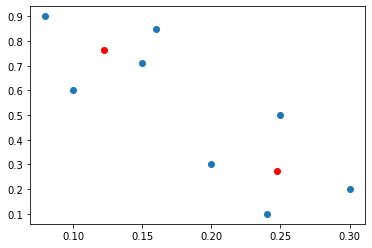

In [21]:
# Assignment on K-Means Clustering:
# We have given a collection of 8 points. P1=[0.1,0.6] ,P2=[0.15,0.71], P3=[0.08,0.9] P4=[0.16, 0.85], P5=[0.2,0.3], P6=[0.25,0.5], P7=[0.24,0.1], P8=[0.3,0.2]. Perform the k-
# mean clustering with initial centroids as m1=P1 = Cluster#1=C1 and m2=P8=cluster#2=C2. Answer the following:
# 1] Which cluster does P6 belong to?
# 2] What is the population of cluster around m2? 3] What is updated value of m1 and m2?

import math
import matplotlib.pyplot as plt

def manhattan_distance(x1,y1,x2,y2):
    return math.fabs(x1-x2)+math.fabs(y1-y2)

def assign_labels(datapoints,centroids,labels):

    x1_C=centroids[0][0]
    y1_C=centroids[0][1]

    x2_C=centroids[1][0]
    y2_C=centroids[1][1]

    index=0
    for point in datapoints:
        x=point[0]
        y=point[1]

        dist1=manhattan_distance(x,y,x1_C,y1_C)

        dist2=manhattan_distance(x,y,x2_C,y2_C)

        if dist1<=dist2:
            labels[index]=1
        else:
            labels[index]=2

        index+=1

    return

def get_new_centroids(datapoints,labels):    
    len_1=0
    len_2=0

    sum_1_x=0
    sum_1_y=0

    sum_2_x=0
    sum_2_y=0

    index=0
    for point in datapoints:
        x=point[0]
        y=point[1]

        if labels[index]==1:
            len_1+=1
            sum_1_x+=x
            sum_1_y+=y
        else:
            len_2+=1
            sum_2_x+=x
            sum_2_y+=y
        
        index+=1

    newC_x_1=sum_1_x/len_1
    newC_y_1=sum_1_y/len_1

    newC_x_2=sum_2_x/len_2
    newC_y_2=sum_2_y/len_2

    newC1=(newC_x_1,newC_y_1)
    newC2=(newC_x_2,newC_y_2)

    return (newC1,newC2)

def KMeans(datapoints,centroids,old_labels,labels):

    # #go in loop till old_labels!=labels
    while(labels!=old_labels):
        old_labels=labels.copy()

        #assign label to all points acc to manhattan distance
        assign_labels(datapoints,centroids,labels)

        print("After assigning labels",labels)

        new_centroids=get_new_centroids(datapoints,labels)

        centroids[0]=new_centroids[0]
        centroids[1]=new_centroids[1]

        print("Updated Centroids:",centroids)

        print("Old labels",old_labels)
        print("Labels",labels)

    return centroids

#datapoints
datapoints = [
  (0.1,0.6),
  (0.15,0.71),
  (0.08,0.9),
  (0.16, 0.85),
  (0.2,0.3),
  (0.25,0.5),
  (0.24,0.1),
  (0.3,0.2)
]

#initial centroids
centroids = [
  (0.1,0.6),
  (0.3,0.2)
]


labels=[0]*8
old_labels=[-1]*8

new_centroids=KMeans(datapoints,centroids,old_labels,labels)

x=[d[0] for d in datapoints]
y=[d[1] for d in datapoints]

xc=[c[0] for c in new_centroids]
yc=[c[1] for c in new_centroids]

plt.scatter(x,y)
plt.scatter(xc,yc,color="red")
plt.show()